In [94]:
import os
from PIL import Image
from PIL import ImageFile
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [95]:
def Threshold(image):
    gray = cv.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret, binary = cv.threshold(gray,255,0,cv2.THRESH_OTSU)
    return binary

In [96]:
# 压缩图片文件
def compress_image(outfile, mb=2, quality=85, k=0.9): # 通常你只需要修改mb大小
    """不改变图片尺寸压缩到指定大小
    :param outfile: 压缩文件保存地址
    :param mb: 压缩目标，KB
    :param k: 每次调整的压缩比率
    :param quality: 初始压缩比率
    :return: 压缩文件地址，压缩文件大小
    """
 
    o_size = os.path.getsize(outfile) // 1024  # 函数返回为字节，除1024转为kb（1kb = 1024 bit）
    print('before_size:{} after_size:{}'.format(o_size, mb))
    if o_size <= mb:
        return outfile
    
    ImageFile.LOAD_TRUNCATED_IMAGES = True  # 防止图像被截断而报错
    
    while o_size > mb:
        im = Image.open(outfile)
        x, y = im.size
        out = im.resize((int(x*k), int(y*k)), Image.ANTIALIAS)  # 最后一个参数设置可以提高图片转换后的质量
        try:
            out.save(outfile, quality=quality)  # quality为保存的质量，从1（最差）到95（最好），此时为85
        except Exception as e:
            print(e)
            break
        o_size = os.path.getsize(outfile) // 1024
    print(o_size)
    return outfile

In [97]:
def imageChange(path):  #单张图片地址
# 压缩单张图片
    outfile = compress_image(path)
    pre_image = cv.imread(outfile,0)
#     plt.imshow(image.squeeze())
    print(pre_image.shape)
    #resize图片大小 先将原本的(45，37) ---> (28,28)
    pred_img = cv.resize(pre_image,(28,28))                          
    #转换np数组格式
    pred_img_arry = np.array(pred_img)   
    #重新reshape图片                      
    pred_img = pred_img_arry.reshape(-1,28,28,1)
    #查看reshape后的图片shape                       
    print(pred_img.shape)
    return pred_img_arry,pred_img

In [98]:
import csv,os
def convert_img_to_csv(dirpath,image,imageArry):
    #设置需要保存的csv路径
    with open(dirpath,"w",newline="") as f:
        #设置csv文件的列名
        column_name = []
        column_name.extend(["pixel%d"%i for i in range(28*28)])
        #将列名写入到csv文件中
        writer = csv.writer(f)
        writer.writerow(column_name)
        row_data = []
        #获取图片的像素
        for i in range(28):
            for j in range(28):
                row_data.append(imageArry[i][j])
#         将图片数据写入到csv文件中
        writer.writerow(row_data) 

In [99]:
# def inverse(image):
#     #颜色取反，拿二值化图片最明显了
#     dst = cv.bitwise_not(image)
#     cv.waitKey(0)
#     return dst

In [100]:
import h5py
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
file = h5py.File('model/mymodel.h5')
model = load_model(file)

In [102]:
path = r'./picture/3_1.png'
dirpath = r'./picture/3_1.csv'
imageArry,image = imageChange(path)
for i in range(28):
    for j in range(28):
        if(imageArry[i][j]>125):
            imageArry[i][j] = 0
        else:
            imageArry[i][j] = 255
convert_img_to_csv(dirpath,image,imageArry)

before_size:9 after_size:2
2
(54, 54)
(1, 28, 28, 1)


C:\Users\YS\AppData\Local\Temp\ipykernel_19644\3409835289.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  out = im.resize((int(x*k), int(y*k)), Image.ANTIALIAS)  # 最后一个参数设置可以提高图片转换后的质量


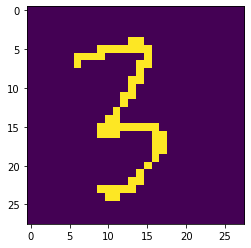

In [103]:
plt.imshow(image.squeeze())

In [104]:
predict = pd.read_csv(dirpath)
predict = np.array(predict).reshape(-1,28,28,1)/255.0
val = model.predict(predict,batch_size=64)

1/1 [==============================] - 0s 168ms/step


In [105]:
val = np.argmax(val,axis = 1)
val

array([3], dtype=int64)

In [187]:
# # 批量压缩图片
# path = r'C:\Users\Yesir\Downloads\compress\\' # 待压缩图片文件夹
# for img in os.listdir(path):
#     compress_image(path + str(img))

In [39]:
import cv2 as cv
import numpy as np
# 压缩单张图片
outfile = r'./picture/9_0.png' # 单张图片地址
pre_image = cv.imread(outfile,0)
print(pre_image.shape)
#resize图片大小 先将原本的(224,222,3) ---> (28,28,3)
pred_img = cv.resize(pre_image,(28,28))                          
#转换np数组格式
pred_img = np.array(pred_img)   
#重新reshape图片                      
pred_img = pred_img.reshape(-1,28,28,1)
#查看reshape后的图片shape                       
print(pred_img.shape)

(86, 78)
(1, 28, 28, 1)


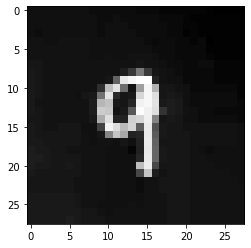

In [40]:
import matplotlib.pyplot as plt
plt.imshow(pred_img.squeeze(), interpolation = "none", cmap = "Greys")